In [1]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")

In [ ]:
starttime = UTCDateTime("2015-01-01")
endtime = UTCDateTime("2016-01-01")

cat = client.get_events(starttime=starttime, endtime=endtime,
                       minmagnitude=5, catalog="ISC")
print(cat)  

In [10]:
print(cat)  

1236 Event(s) in Catalog:
2015-08-31T06:07:39.150000Z | -31.097, -177.697 | 5.0 MW
2015-08-30T05:30:58.530000Z | +29.676, +130.413 | 5.1 MW
...
2015-01-01T12:16:14.710000Z | +40.438, -125.565 | 5.4 MW
2015-01-01T08:49:54.260000Z | +28.708,  +51.872 | 5.1 mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [20]:
print(cat.events[0].magnitudes[0].mag)
print(len(cat))

5.0
1236


In [18]:
import numpy as np

In [22]:
catnum = np.zeros(len(cat))
ii = 0
for ievt in cat.events:
    catnum[ii]=ievt.magnitudes[0].mag
    ii = ii+1


In [24]:
print(catnum)

[ 5.   5.1  5.  ...,  5.1  5.4  5.1]


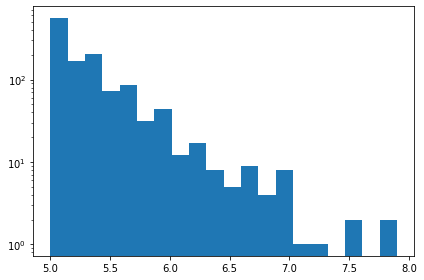

In [28]:
import matplotlib.pyplot as plt

n_bins = 20
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs.hist(catnum, bins=n_bins)
axs.set_yscale('log')
